In [95]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [96]:
# Function to convert a given decimal number to a ternary
def ter(n):  
    ans = ""
    while n > 0: 
        dig = int(n%3)
        ans += str(dig)
        n //= 3
    ans = ans[::-1]  #To reverse the string
    return ans

In [97]:
rule_number = 110
length = 20
time = 50

In [98]:
# make the initial condition
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,2))

In [99]:
# create list of neighborhood tuples in lex. order
neighborhoods = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

# convert the rule number to ternary and padd with 0s as needed
in_ternary = str(ter(rule_number))[::-1]
ternary_length = len(in_ternary)
if ternary_length != 9:
    padding = 9 - ternary_length
    in_ternary = in_ternary + '0'*padding

In [100]:
# create the lookup table dictionary
lookup_table = {}
for i in range(9):
    key = neighborhoods[i]
    val = in_ternary[i]
    lookup_table.update({key:val})
for key, val in lookup_table.items():
    print(key, '-->', val)    

(0, 0) --> 2
(0, 1) --> 0
(0, 2) --> 0
(1, 0) --> 1
(1, 1) --> 1
(1, 2) --> 0
(2, 0) --> 0
(2, 1) --> 0
(2, 2) --> 0


In [101]:
# initialize spacetime field and current configuration
spacetime_field = [initial_condition]
current_configuration = initial_condition.copy()

In [102]:
# apply the lookup table to evolve the CA for the given number of time steps
for t in range(time):
    new_configuration = []
    for i in range(len(current_configuration)):
        
        neighborhood = (current_configuration[(i-1)], 
                        current_configuration[i])
        
        new_configuration.append(int(lookup_table[neighborhood]))
        
    current_configuration = new_configuration
    spacetime_field.append(new_configuration)

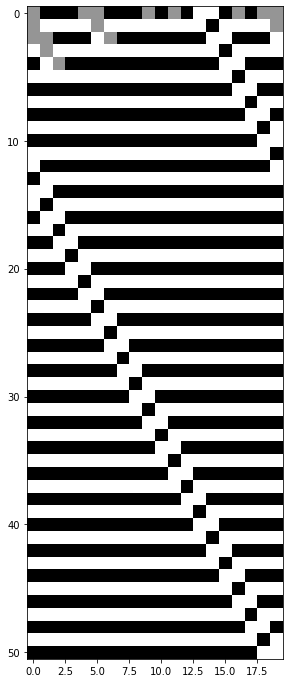

In [103]:
# plot the spacetime field diagram
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
plt.show()